Init:

In [57]:
from matplotlib import pyplot
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Process the Trips CSV file
trips_df = pd.read_csv("../ferry_tips_data.csv")


Filter for only line 17

c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\

<Axes: title={'center': 'Cars carried on 2024-02-11'}, xlabel='time_departure'>

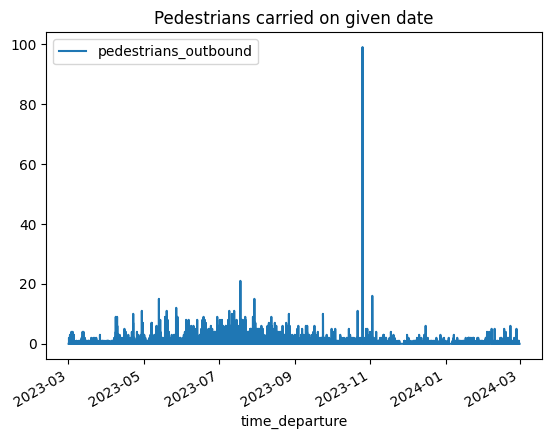

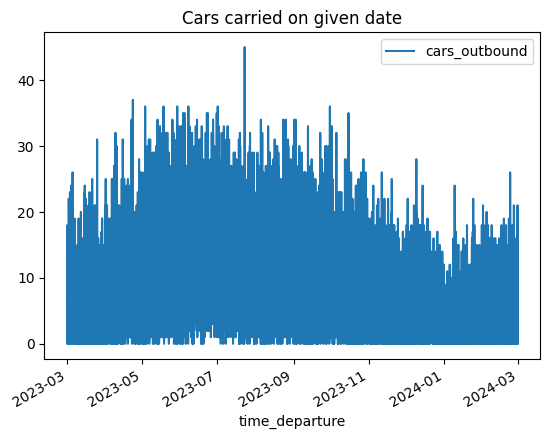

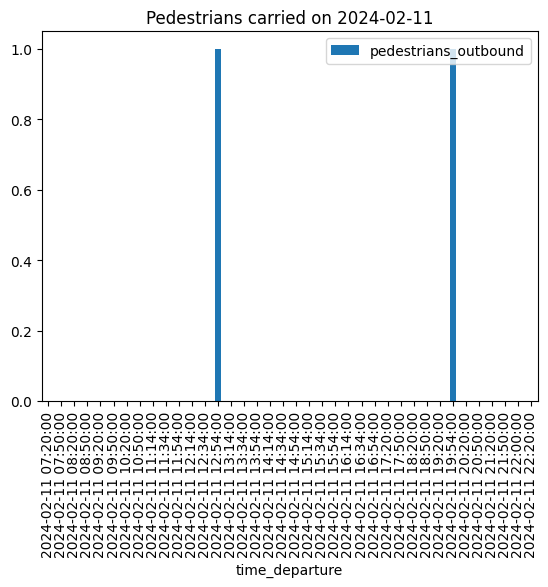

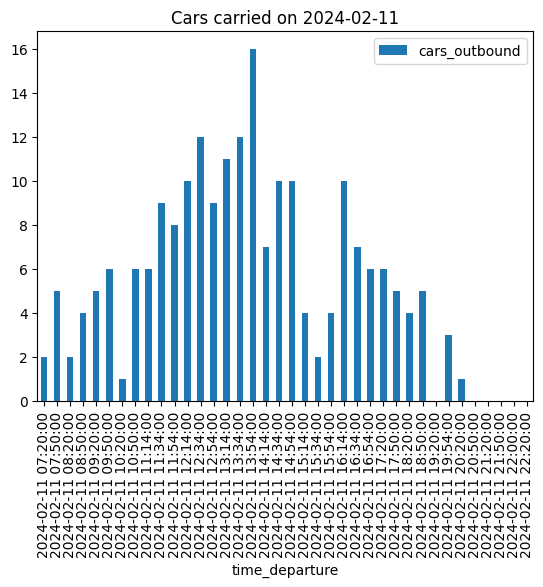

In [58]:
route17 = trips_df[trips_df["route_id"] == 17] # Filter for line 

#make date good
route17.loc[: ,"time_departure"] = route17["time_departure"].apply(lambda x: datetime.datetime.fromisoformat(x))

route17.plot(x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on given date")
route17.plot(x= "time_departure", y="cars_outbound", title="Cars carried on given date")

#filter for a random day
route17day = route17[route17["time_departure"] > datetime.datetime(2024, 2, 11)]
route17day = route17day[route17day["time_departure"] < datetime.datetime(2024, 2, 12)]

route17day.plot(kind= "bar", x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on 2024-02-11")
route17day.plot(kind= "bar", x= "time_departure", y="cars_outbound", title="Cars carried on 2024-02-11")

The amount of empty trips is on :

c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Empty outbound travels 6
Empty inbound travels 5


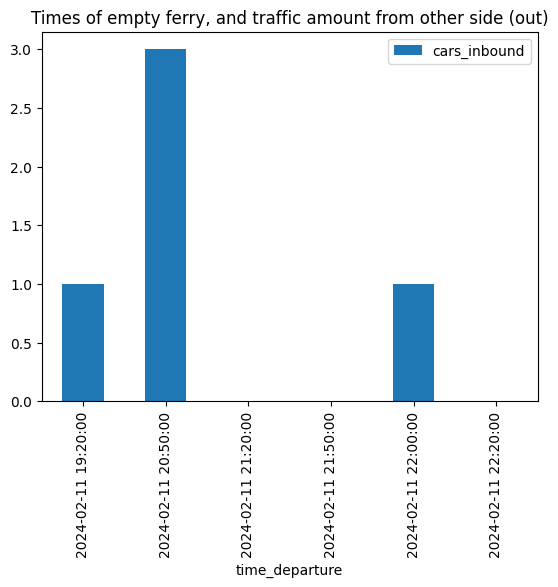

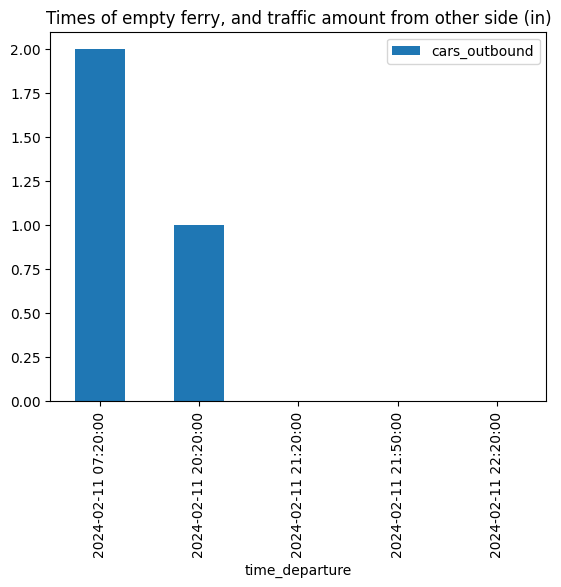

In [62]:
#first we count when the ferry was empty travelling one way
route17outempties = route17day.query("cars_outbound == 0 and trucks_outbound == 0 and trucks_with_trailer_outbound == 0 and motorcycles_outbound == 0 and exemption_vehicles_outbound == 0 and buses_outbound == 0")
route17outempties.plot(kind="bar", x= "time_departure", y="cars_inbound", title="Times of empty ferry, and traffic amount from other side (out)")

#then we count it being empty the other way.
route17inempties = route17day.query("cars_inbound == 0 and trucks_inbound == 0 and trucks_with_trailer_inbound == 0 and motorcycles_inbound == 0 and exemption_vehicles_inbound == 0 and buses_inbound == 0")
route17inempties.plot(kind="bar", x= "time_departure", y="cars_outbound", title="Times of empty ferry, and traffic amount from other side (in)")

print("Empty outbound travels", route17outempties.shape[0]) # The first dimesion of the table is the amount of records
print("Empty inbound travels", route17inempties.shape[0]) # The first dimesion of the table is the amount of records